# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejmplo encajaría muy bien una regresión lineal.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../día_1/position_salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
sns.regplot(data = df,
           x = "YearsExperience",
           y="Salary");

KeyError: 'YearsExperience'

El problema es que en la vida real, los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [21]:
df = pd.read_csv('../día_1/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

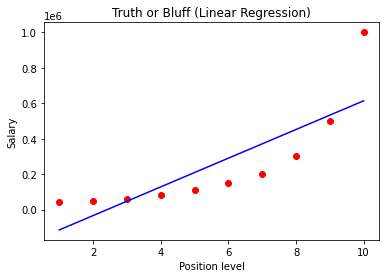

In [24]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias. Si degree = 3 y tenemos dos features (a, b), realizará a^2, b^2, b^3, b^3, ab, a^2b, ab^2

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X)
X_poly = poly_reg.transform(X)

In [27]:
X_poly
# unos por potencia 0 y para intercept

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [28]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

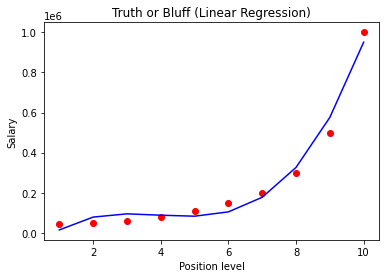

In [29]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [30]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [31]:
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [32]:
poly_reg.transform([[5.5]]) #5.5 es el nuevo dato ==> espera predicción

array([[  1.   ,   5.5  ,  30.25 , 166.375]])

In [34]:
print(lin_reg.predict([[5.5]])) # predicción si transformar la regresión a 'Polinómica'

print(pol_reg.predict(poly_reg.transform([[5.5]]))) # predicción modificando los datos X a polinómicos para que se ajusten mejor

[249500.]
[89187.5]
